In [32]:
import Pkg
Pkg.add("DataFrames")
Pkg.add("CausalInference")
Pkg.add("Graphs")
Pkg.add("Test")
Pkg.add("Statistics")
Pkg.add("CairoMakie")
Pkg.add("GraphMakie")
Pkg.add("StatsModels")

   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.

In [33]:
using DataFrames, CausalInference, StatsModels
using Graphs
using Test
using Random
using Statistics
using CairoMakie
using GraphMakie
using GLM

In [10]:
function plotgraph(g)
    f, ax, p = graphplot(g,
        nlabels = repr.(1:nv(g)),
        nlabels_color = [:red for i in 1:nv(g)],
    )
    offsets = 0.05 * (p[:node_pos][] .- p[:node_pos][][1])
    offsets[1] = Point2f(0, 0.2)
    p.nlabels_offset[] = offsets
    autolimits!(ax)
    hidedecorations!(ax)
    hidespines!(ax)
    ax.aspect = DataAspect()
    return f
end

plotgraph (generic function with 1 method)

In [47]:
#Setting the Seed
Random.seed!(123)

#Modelo 1
pgd1 = (Z = rand(1000))
pgd2 = (X = rand(1000) + 0.5*X)
pgd3 = (Y = rand(1000) + 0.1*X+0.3*Z)


matrix_data_all = [DataFrame(Y = pgd3) DataFrame(X = pgd2) DataFrame(Z =pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([ (1, 3),() , (2, 3)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.643991   0.0194142  33.17    <1e-99  0.605894    0.682088
X            0.120383   0.0223072   5.40    <1e-07  0.0766083   0.164157
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)

LoadError: BoundsError: attempt to access Tuple{} at index [1]

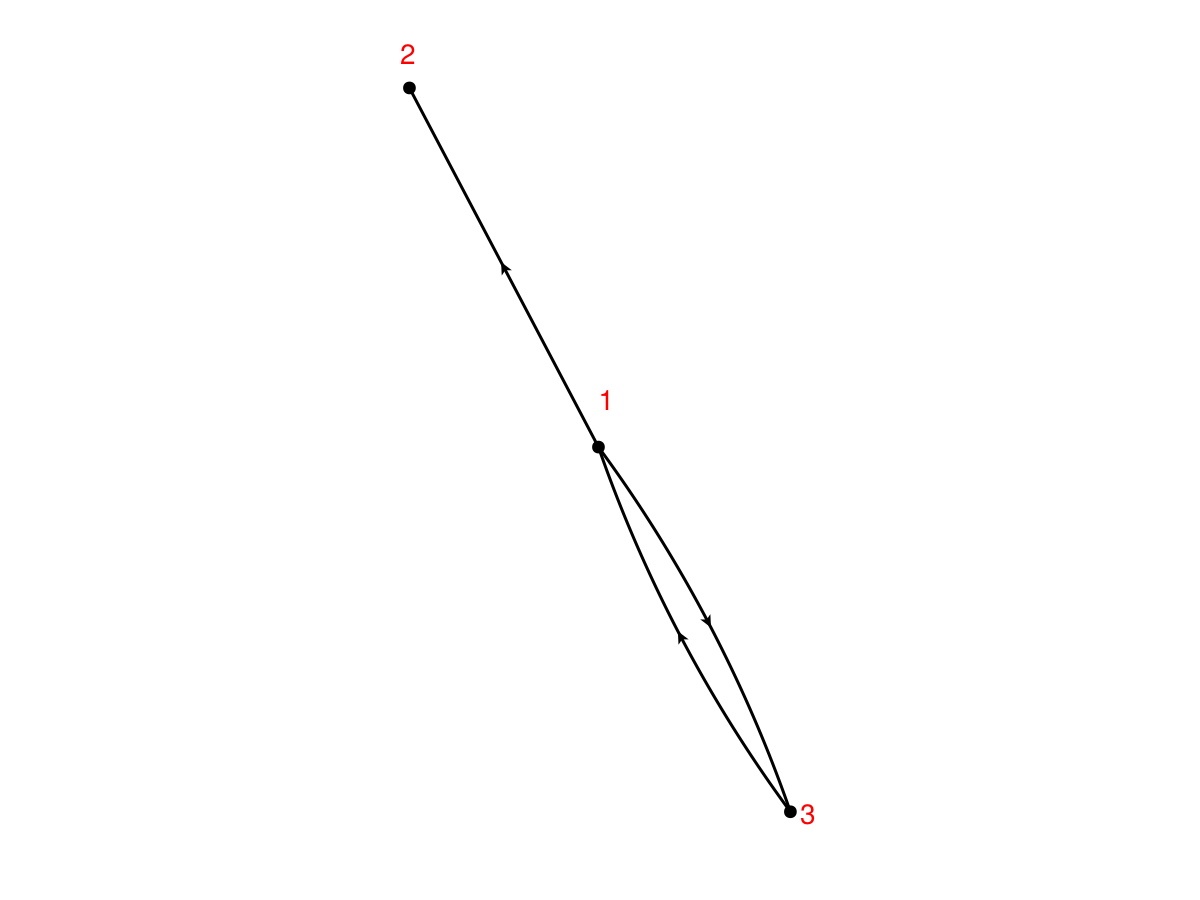